In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import time
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
popular_100_df = pd.read_csv("Resources/Most popular 100 movies.csv", index_col=0)
popular_100_df.head()

,genre_ids,movie id,overview,popularity rank,title,year
0,"[878, 28, 53]",169,Ten years after a band of mercenaries first ba...,1,Predator 2,1990
1,"[14, 18, 10749]",162,A small suburban town receives a visit from a ...,2,Edward Scissorhands,1990
2,"[28, 53]",1573,John McClane is an off-duty cop gripped with a...,3,Die Hard 2,1990
3,"[10749, 35]",114,When a millionaire wheeler-dealer enters a bus...,4,Pretty Woman,1990
4,"[12, 10751]",71805,A young Norwegian boy in 1850s England goes to...,5,Shipwrecked,1990


In [4]:
movie_list=[]
year=[]
sentiment_compound=[]
for index, row in popular_100_df.iterrows():
    sentiment_results = analyzer.polarity_scores(row["overview"])
    sentiment_comp = sentiment_results["compound"]
    sentiment_compound.append(sentiment_comp)
    movie_list.append(row["movie id"])
    year.append(row["year"]) 


In [5]:
df_sentiment_analytics = pd.DataFrame({"movie id": movie_list,
                        "sentiment comp": sentiment_compound,
                        "Year": year})
df_sentiment_analytics.head()

,movie id,sentiment comp,Year
0,169,-0.9169,1990
1,162,0.0000,1990
2,1573,0.7096,1990
3,114,-0.1280,1990
4,71805,0.0000,1990


In [6]:
group_by_yearmonth = df_sentiment_analytics.groupby(df_sentiment_analytics["Year"])
df_grouped = pd.DataFrame(group_by_yearmonth["sentiment comp"].mean())
df_grouped = df_grouped.reset_index()
df_grouped

,Year,sentiment comp
0,1990,-0.209462
1,1991,-0.082481
2,1992,-0.172803
3,1993,-0.187018
4,1994,-0.042197
5,1995,-0.170106
6,1996,-0.068269
7,1997,-0.082529
8,1998,-0.106904
9,1999,-0.225021


In [7]:
#x_min = datetime.datetime.strptime((df_sentimet_analytics["release date"].min()),"%Y-%m-%d") - datetime.timedelta(days=5)
#x_max = datetime.datetime.strptime((df_sentimet_analytics["release date"].max()),"%Y-%m-%d") + datetime.timedelta(days=5)
#x_max

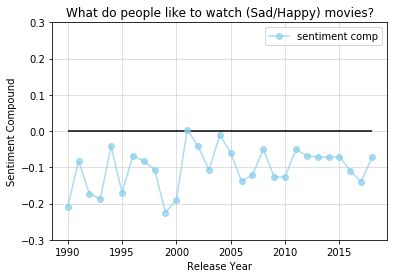

In [27]:
plt.plot(df_grouped["Year"], df_grouped["sentiment comp"], color="skyblue", alpha=0.7,marker="o")
plt.grid(True, alpha=0.5)
plt.title("What do people like to watch (Sad/Happy) movies?")
plt.xlabel("Release Year")
plt.ylabel("Sentiment Compound")
plt.ylim(-.3,.3)
plt.hlines(0,1990,2018)
plt.legend()
plt.figsize=(30,5)